In [108]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# This might be helpful:
from collections import Counter

In [109]:
pd.options.display.float_format = '{:,.2f}'.format

In [278]:
raw_df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
raw_df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
raw_df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
raw_df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
raw_df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [279]:
df_hh_income = raw_df_hh_income.copy()
df_pct_poverty = raw_df_pct_poverty.copy()
df_pct_completed_hs = raw_df_pct_completed_hs.copy()
df_share_race_city = raw_df_share_race_city.copy()
df_fatalities = raw_df_fatalities.copy() 

## PRELIMINARY DATA EXPLORATION

###  MEDIAN_HH_INCOME

In [280]:
df_hh_income.head()
type(df_hh_income["Median Income"][0])

str

In [240]:
df_hh_income.shape

(29322, 3)

In [241]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [242]:
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


###### CONVERT MEDIAN INCOME TO INTEGER

#### CONSIDER DROPPING MISSING VALUES OR FILLING

In [281]:
def format_missing(str):
    if str == "(X)" or str == "-":
        str = np.nan
    elif type(str) == 'str':
        str = str.replace(",", "")
        str = str.replace("-", "")
        str = float(str)
   
        
   
        
    return str
    

df_hh_income["Median Income"] = df_hh_income["Median Income"].apply(format_missing)



In [244]:
type(df_hh_income["Median Income"][233])

str

<AxesSubplot:>

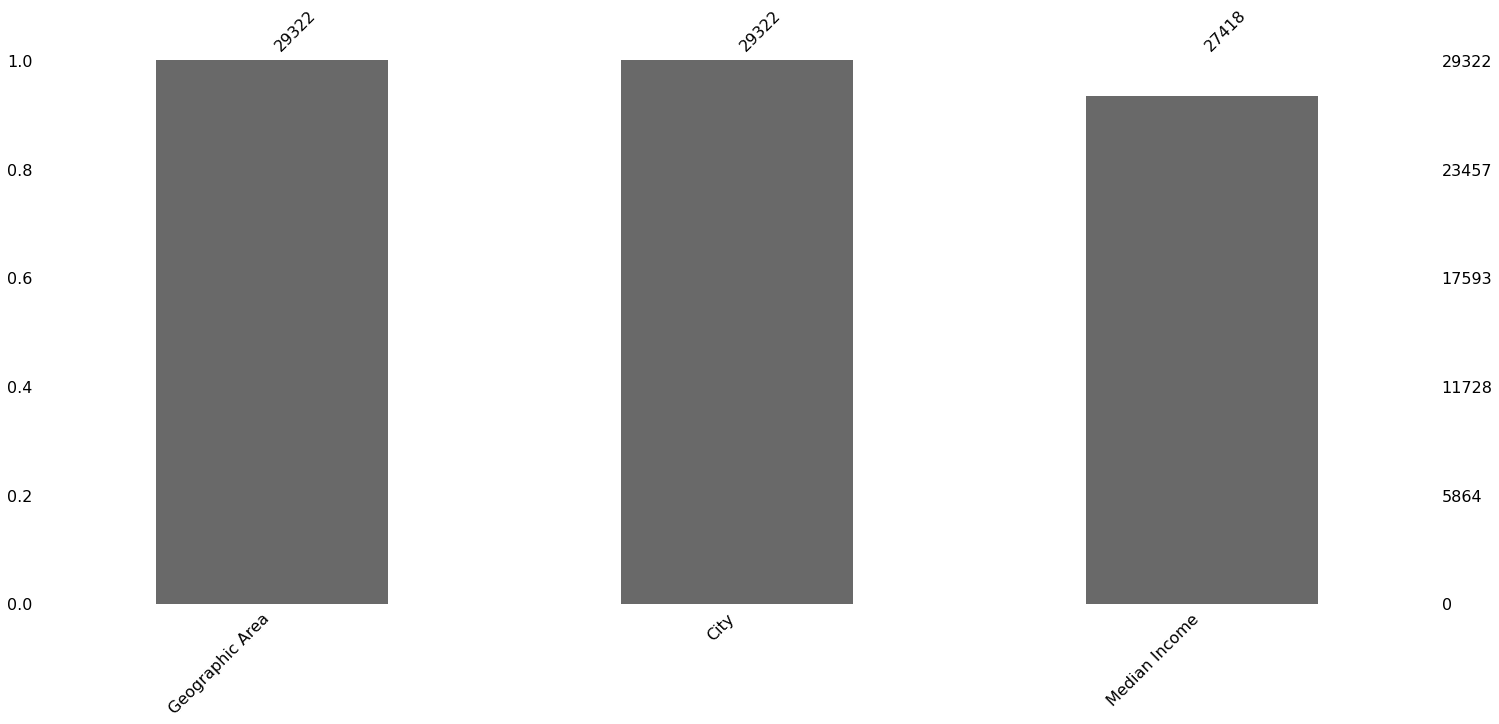

In [245]:
msno.bar(df_hh_income)

<AxesSubplot:>

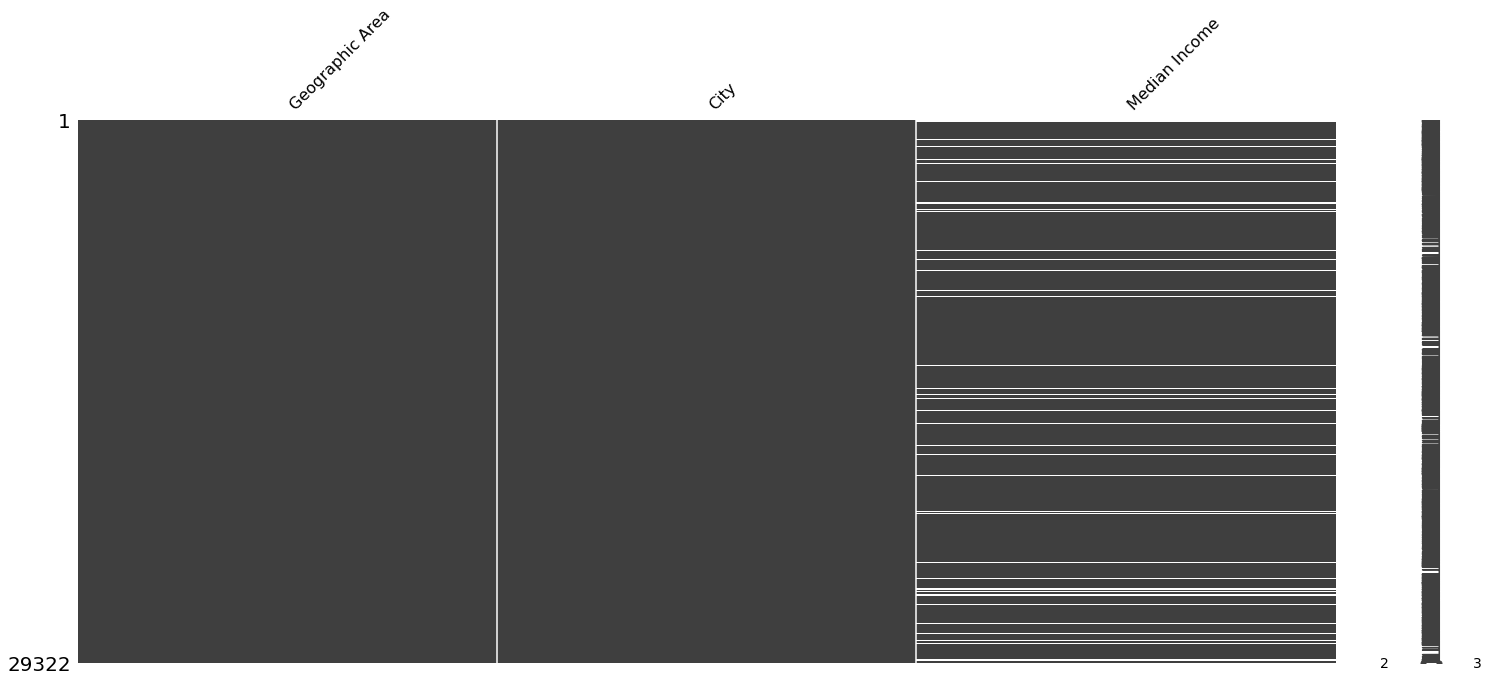

In [246]:
msno.matrix(df_hh_income)

In [247]:
# df_hh_income["Median Income"].fillna(0, inplace=True)

In [248]:
# df_hh_income["Median Income"].apply(lambda x: float(x))

### PCT OVER 25 COMPLETED HIGH SCHOOL

In [282]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [250]:
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [251]:
df_pct_completed_hs.describe()

,Geographic Area,City,percent_completed_hs
count,29329,29329,29329
unique,51,24255,728
top,PA,Franklin city,100
freq,1762,16,1301


##### MERGE HH_INCOME_DF AND PCT_COMPLETED HIGH SCHOOL
##### WRITE FUNCTION TO DROP UNNEEDED ROWS AS NA

In [252]:
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].apply(format_missing)

<AxesSubplot:>

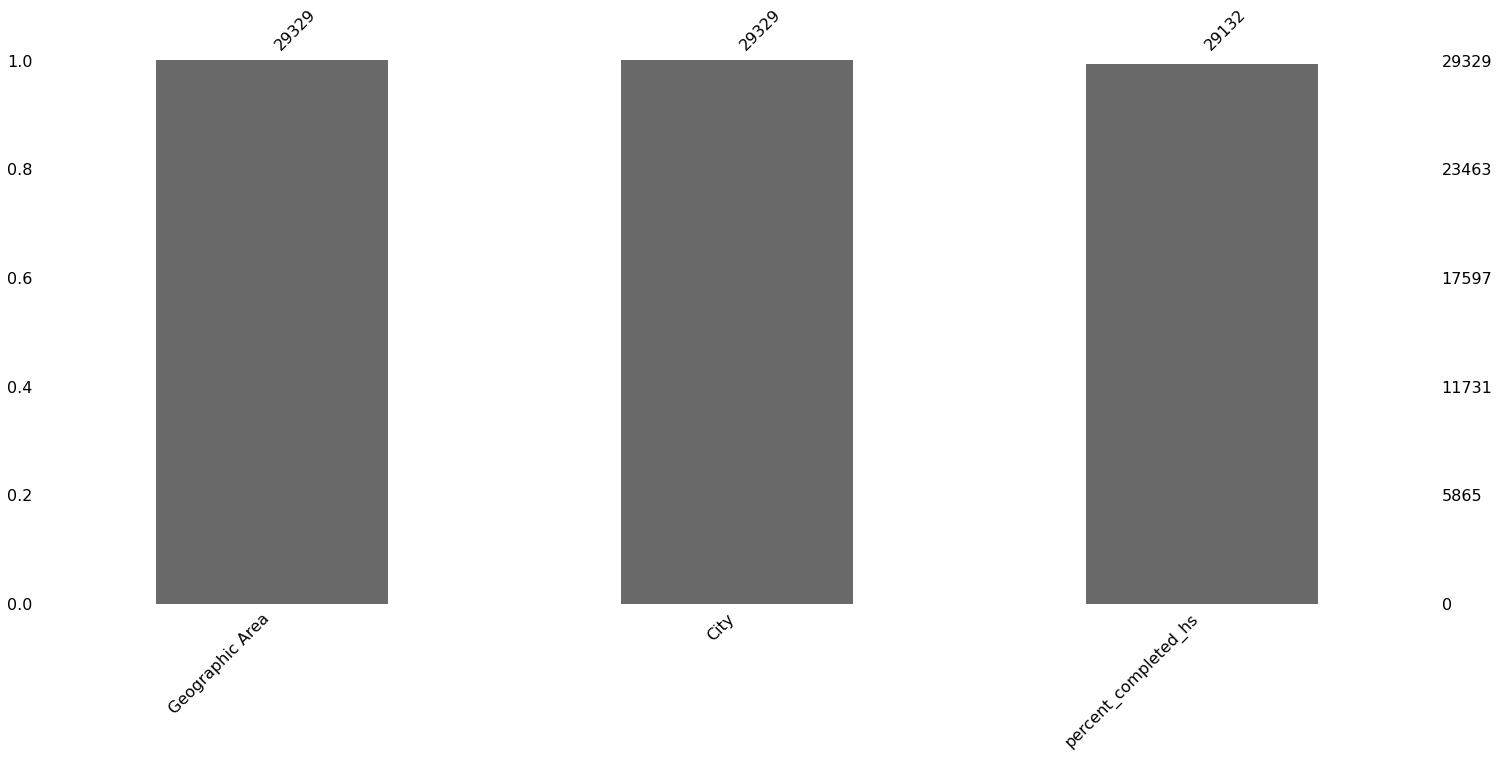

In [253]:
msno.bar(df_pct_completed_hs)

<AxesSubplot:>

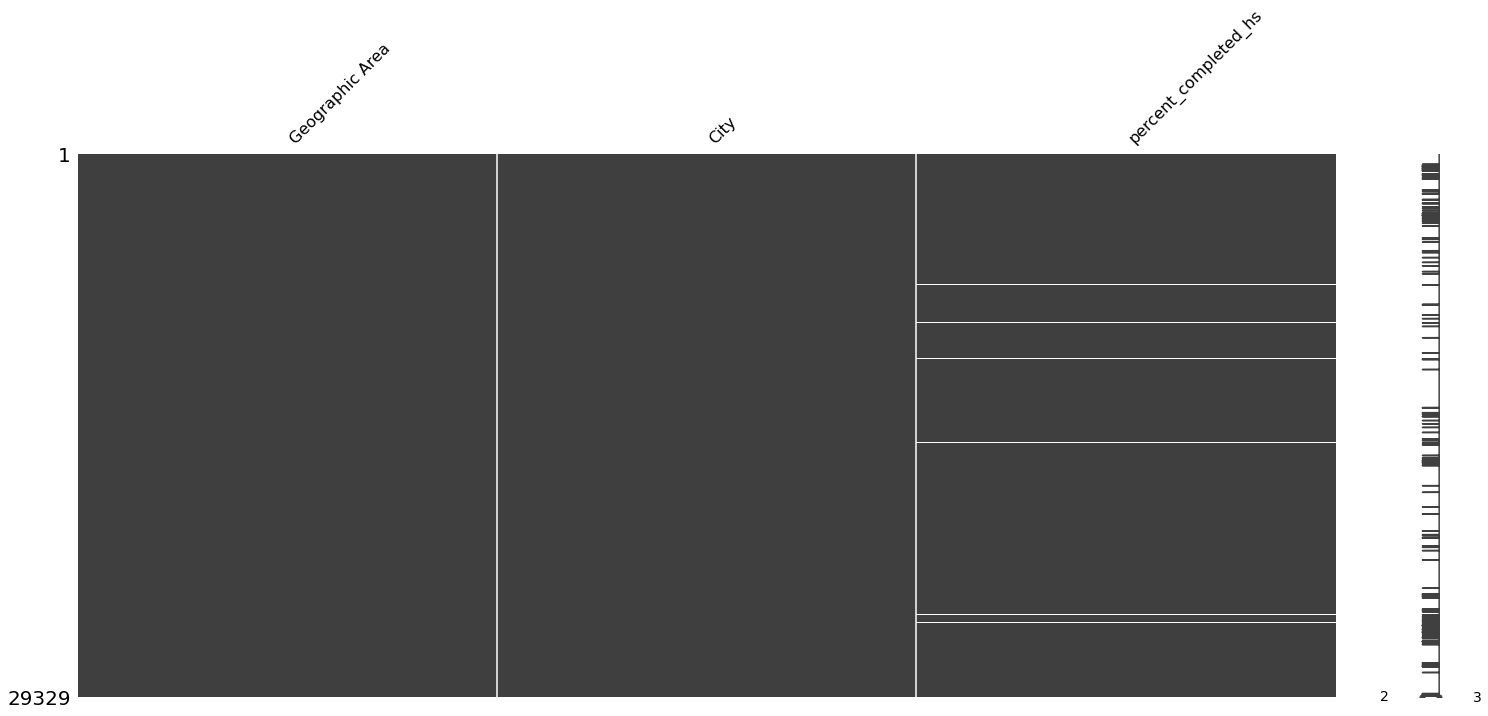

In [254]:
msno.matrix(df_pct_completed_hs)

In [255]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [256]:
df_pct_poverty.shape

(29329, 3)

In [257]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [258]:
df_pct_poverty.describe()

,Geographic Area,City,poverty_rate
count,29329,29329,29329
unique,51,24255,771
top,PA,Franklin city,0
freq,1762,16,1464


In [283]:
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].apply(format_missing)

In [284]:
type(df_pct_poverty["poverty_rate"][15])

str

<AxesSubplot:>

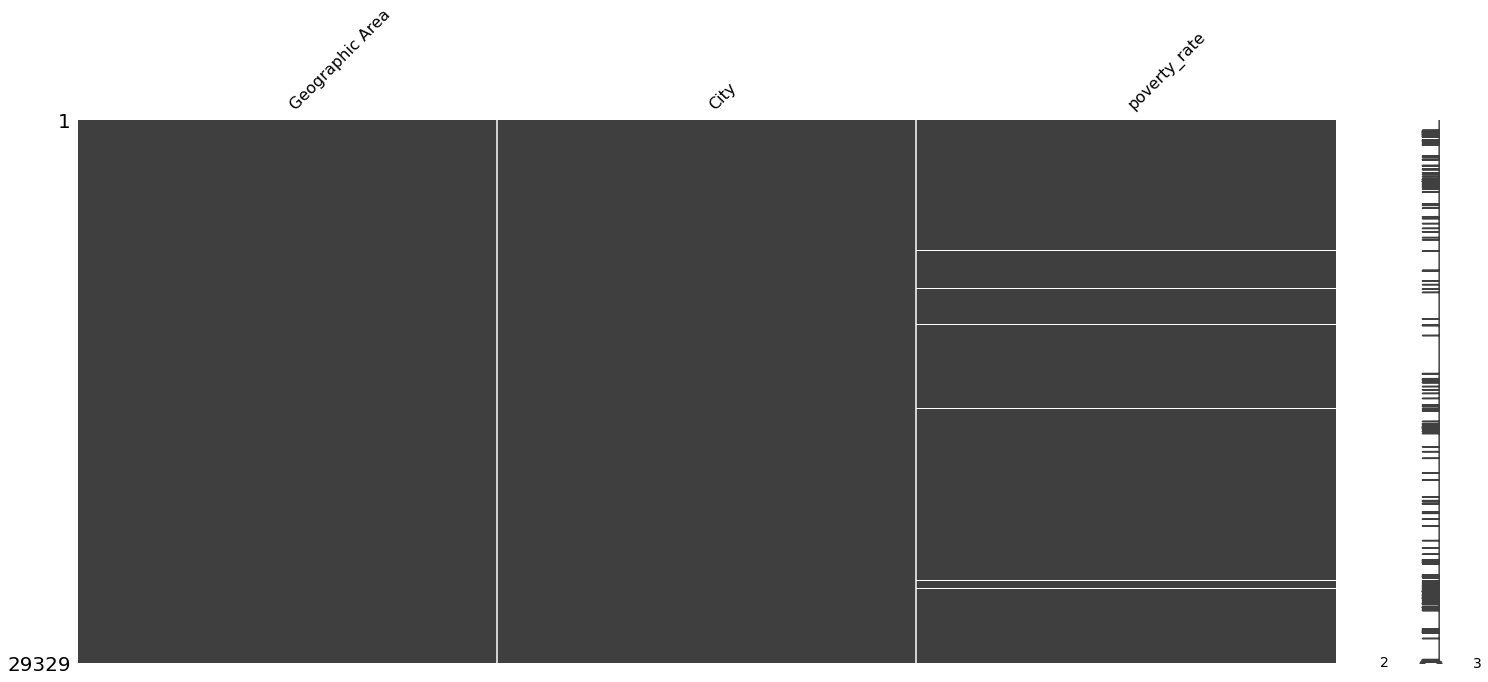

In [261]:
msno.matrix(df_pct_poverty)

In [262]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [263]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [264]:
df_share_race_city.describe()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
count,29268,29268,29268,29268,29268,29268,29268
unique,51,24219,997,926,628,409,956
top,PA,Franklin city,100,0,0,0,0
freq,1764,16,1051,6587,6930,8537,2489


In [295]:
for col in ['share_white', 'share_black','share_native_american', 'share_asian', 'share_hispanic']:
    df_share_race_city[col] = df_share_race_city[col].apply(format_missing).apply(lambda x: float(x)).fillna(0)

<AxesSubplot:>

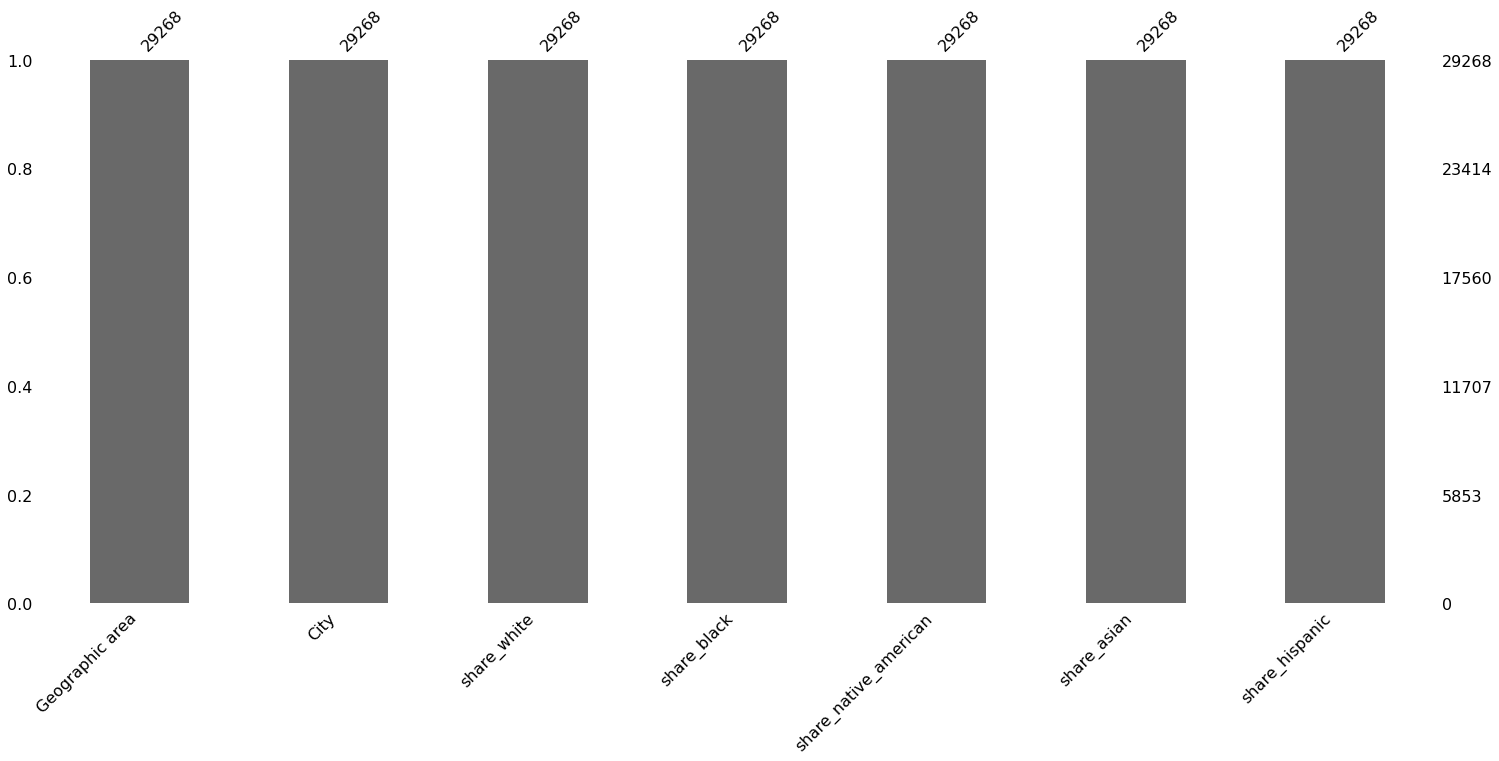

In [296]:
msno.bar(df_share_race_city)

<AxesSubplot:>

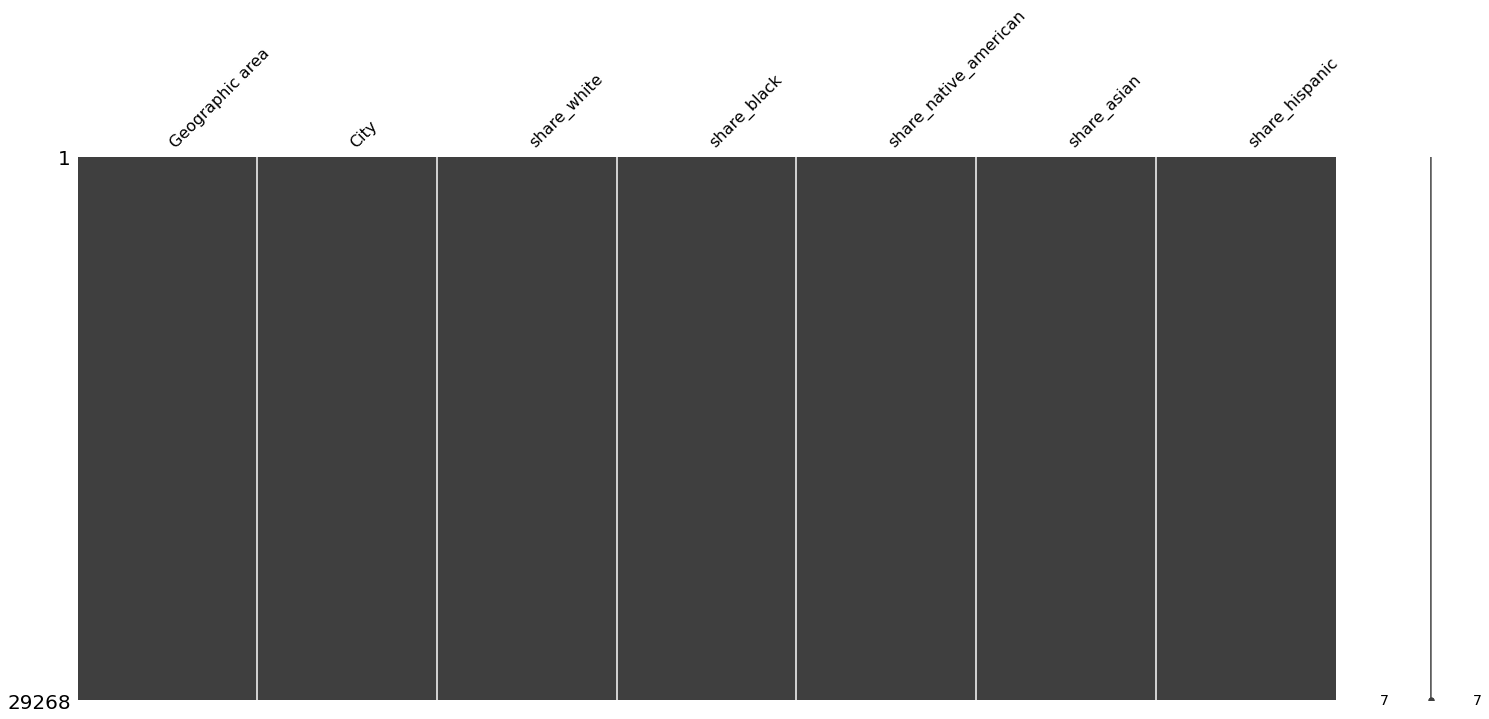

In [297]:
msno.matrix(df_share_race_city)

In [268]:
df_fatalities.shape

(2535, 14)

In [269]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [270]:
# for col in ['manner_of_death', 'armed', 'age', 'gender',
#        'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
#        'flee', 'body_camera']:
#        df_fatalities[col] = df_fatalities[col].apply(format_missing)

<AxesSubplot:>

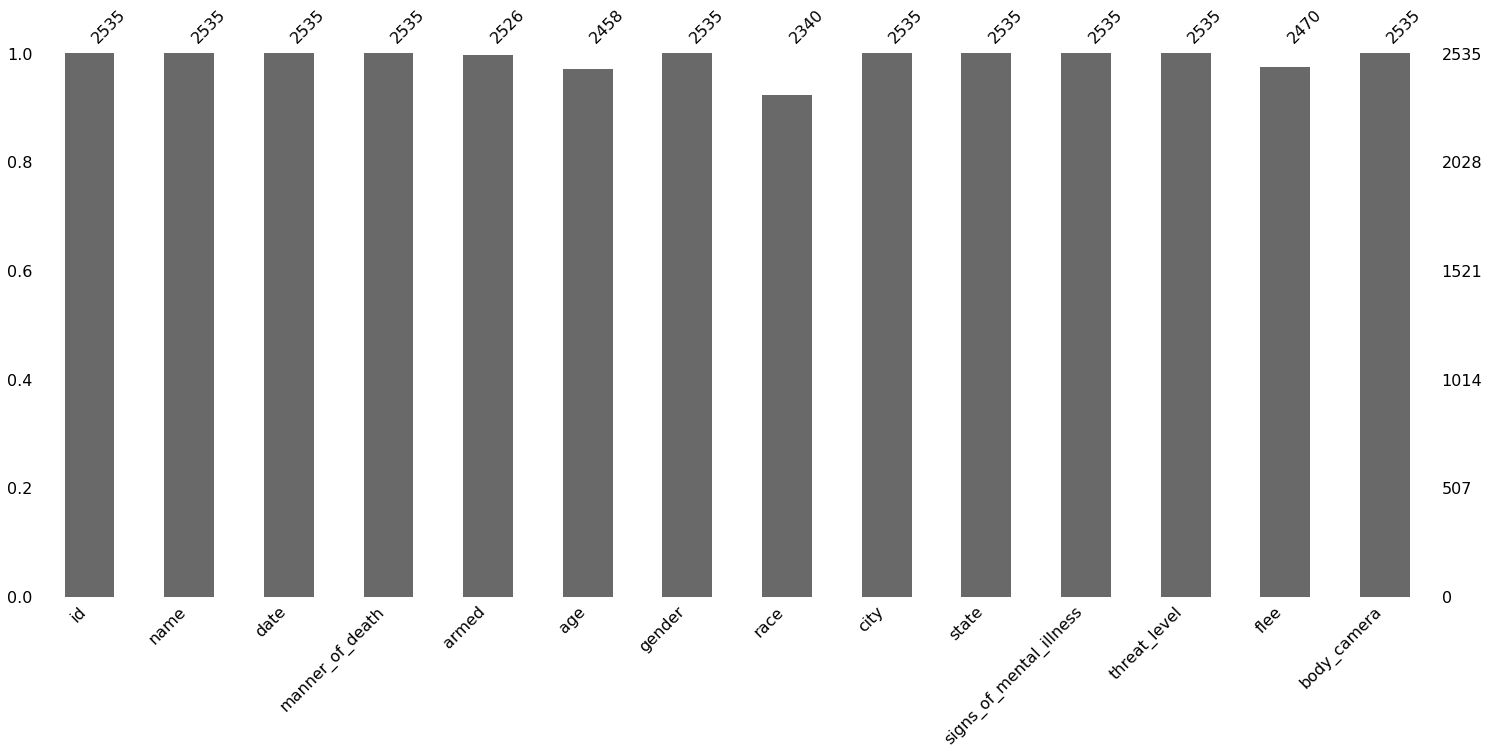

In [271]:
msno.bar(df_fatalities)

<AxesSubplot:>

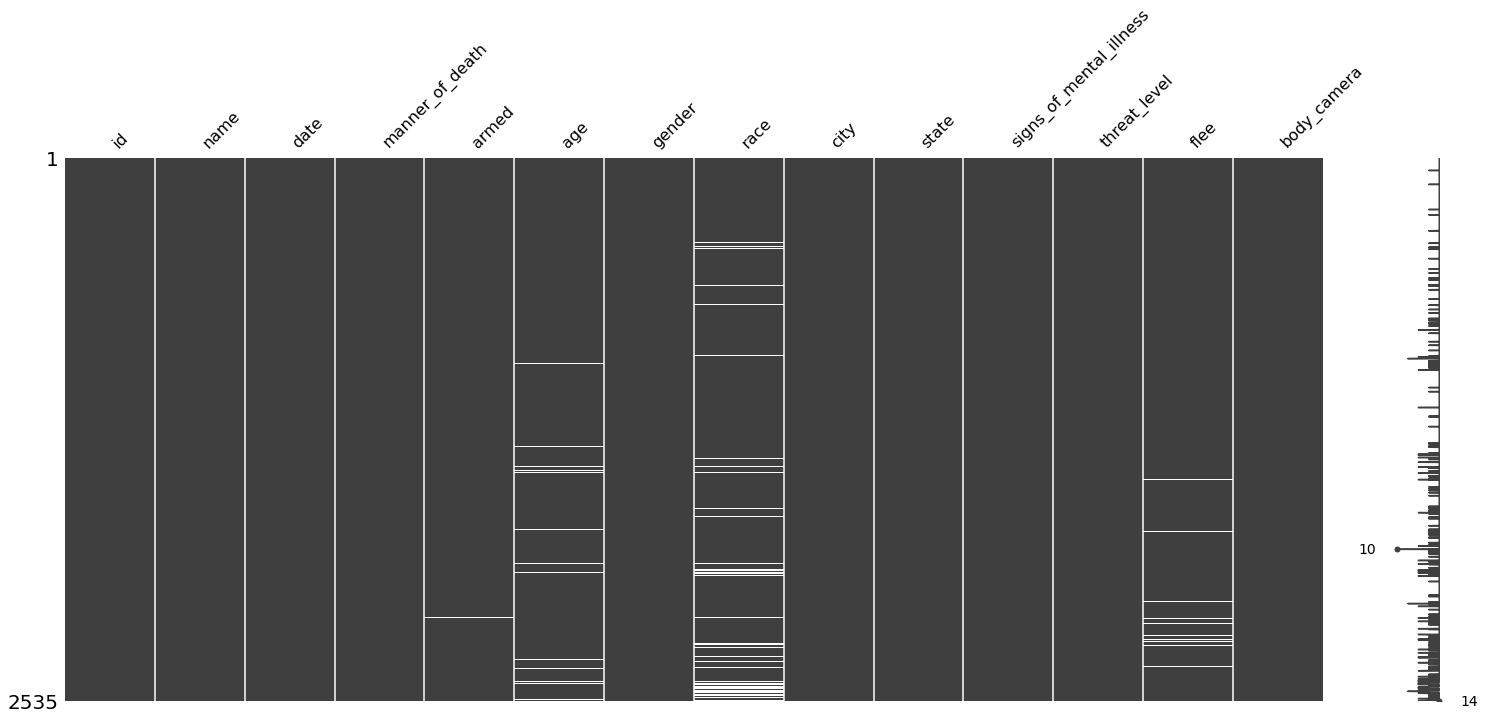

In [272]:
msno.matrix(df_fatalities)

### POVERTY RATE IN EACH STATE

In [285]:
df_pct_poverty.fillna(0, inplace=True)
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"])
# sns.barplot(data=df_pct_poverty, x="Geographic Area", y="poverty_rate")

In [274]:
# df_pct_poverty["Geographic Area"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [286]:
# states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
#        'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
#        'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
#        'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
#        'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
# sum = []

# for state in states:
#     sum.append(df_pct_poverty[df_pct_poverty["Geographic Area"] == state]["poverty_rate"].sum())
# state_data = {
#     "Geographic Area": states,
#     "poverty_rate": sum,
# }
# poverty_df = pd.DataFrame(data=state_data, columns=["Geographic Area", "poverty_rate"])
df_pct_poverty = df_pct_poverty.groupby("Geographic Area", as_index=False)["poverty_rate"].mean()
df_pct_poverty

,Geographic Area,poverty_rate
0,AK,18.68
1,AL,20.61
2,AR,22.96
3,AZ,25.27
4,CA,16.89
5,CO,13.19
6,CT,9.14
7,DC,18.00
8,DE,12.56
9,FL,17.51


In [287]:
px.bar(data_frame=df_pct_poverty, x="Geographic Area", y="poverty_rate")

###### CARLIFORNIA AND TEXAS HAVE THE HIGHEST POVERTY RATE
###### DC HAS THE LOWEST

In [288]:
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].apply(format_missing).apply(lambda x: float(x)).fillna(0)

In [289]:
df_pct_completed_hs = df_pct_completed_hs.groupby("Geographic Area", as_index=False)["percent_completed_hs"].mean()

In [290]:
px.bar(data_frame=df_pct_completed_hs, x="Geographic Area", y="percent_completed_hs")

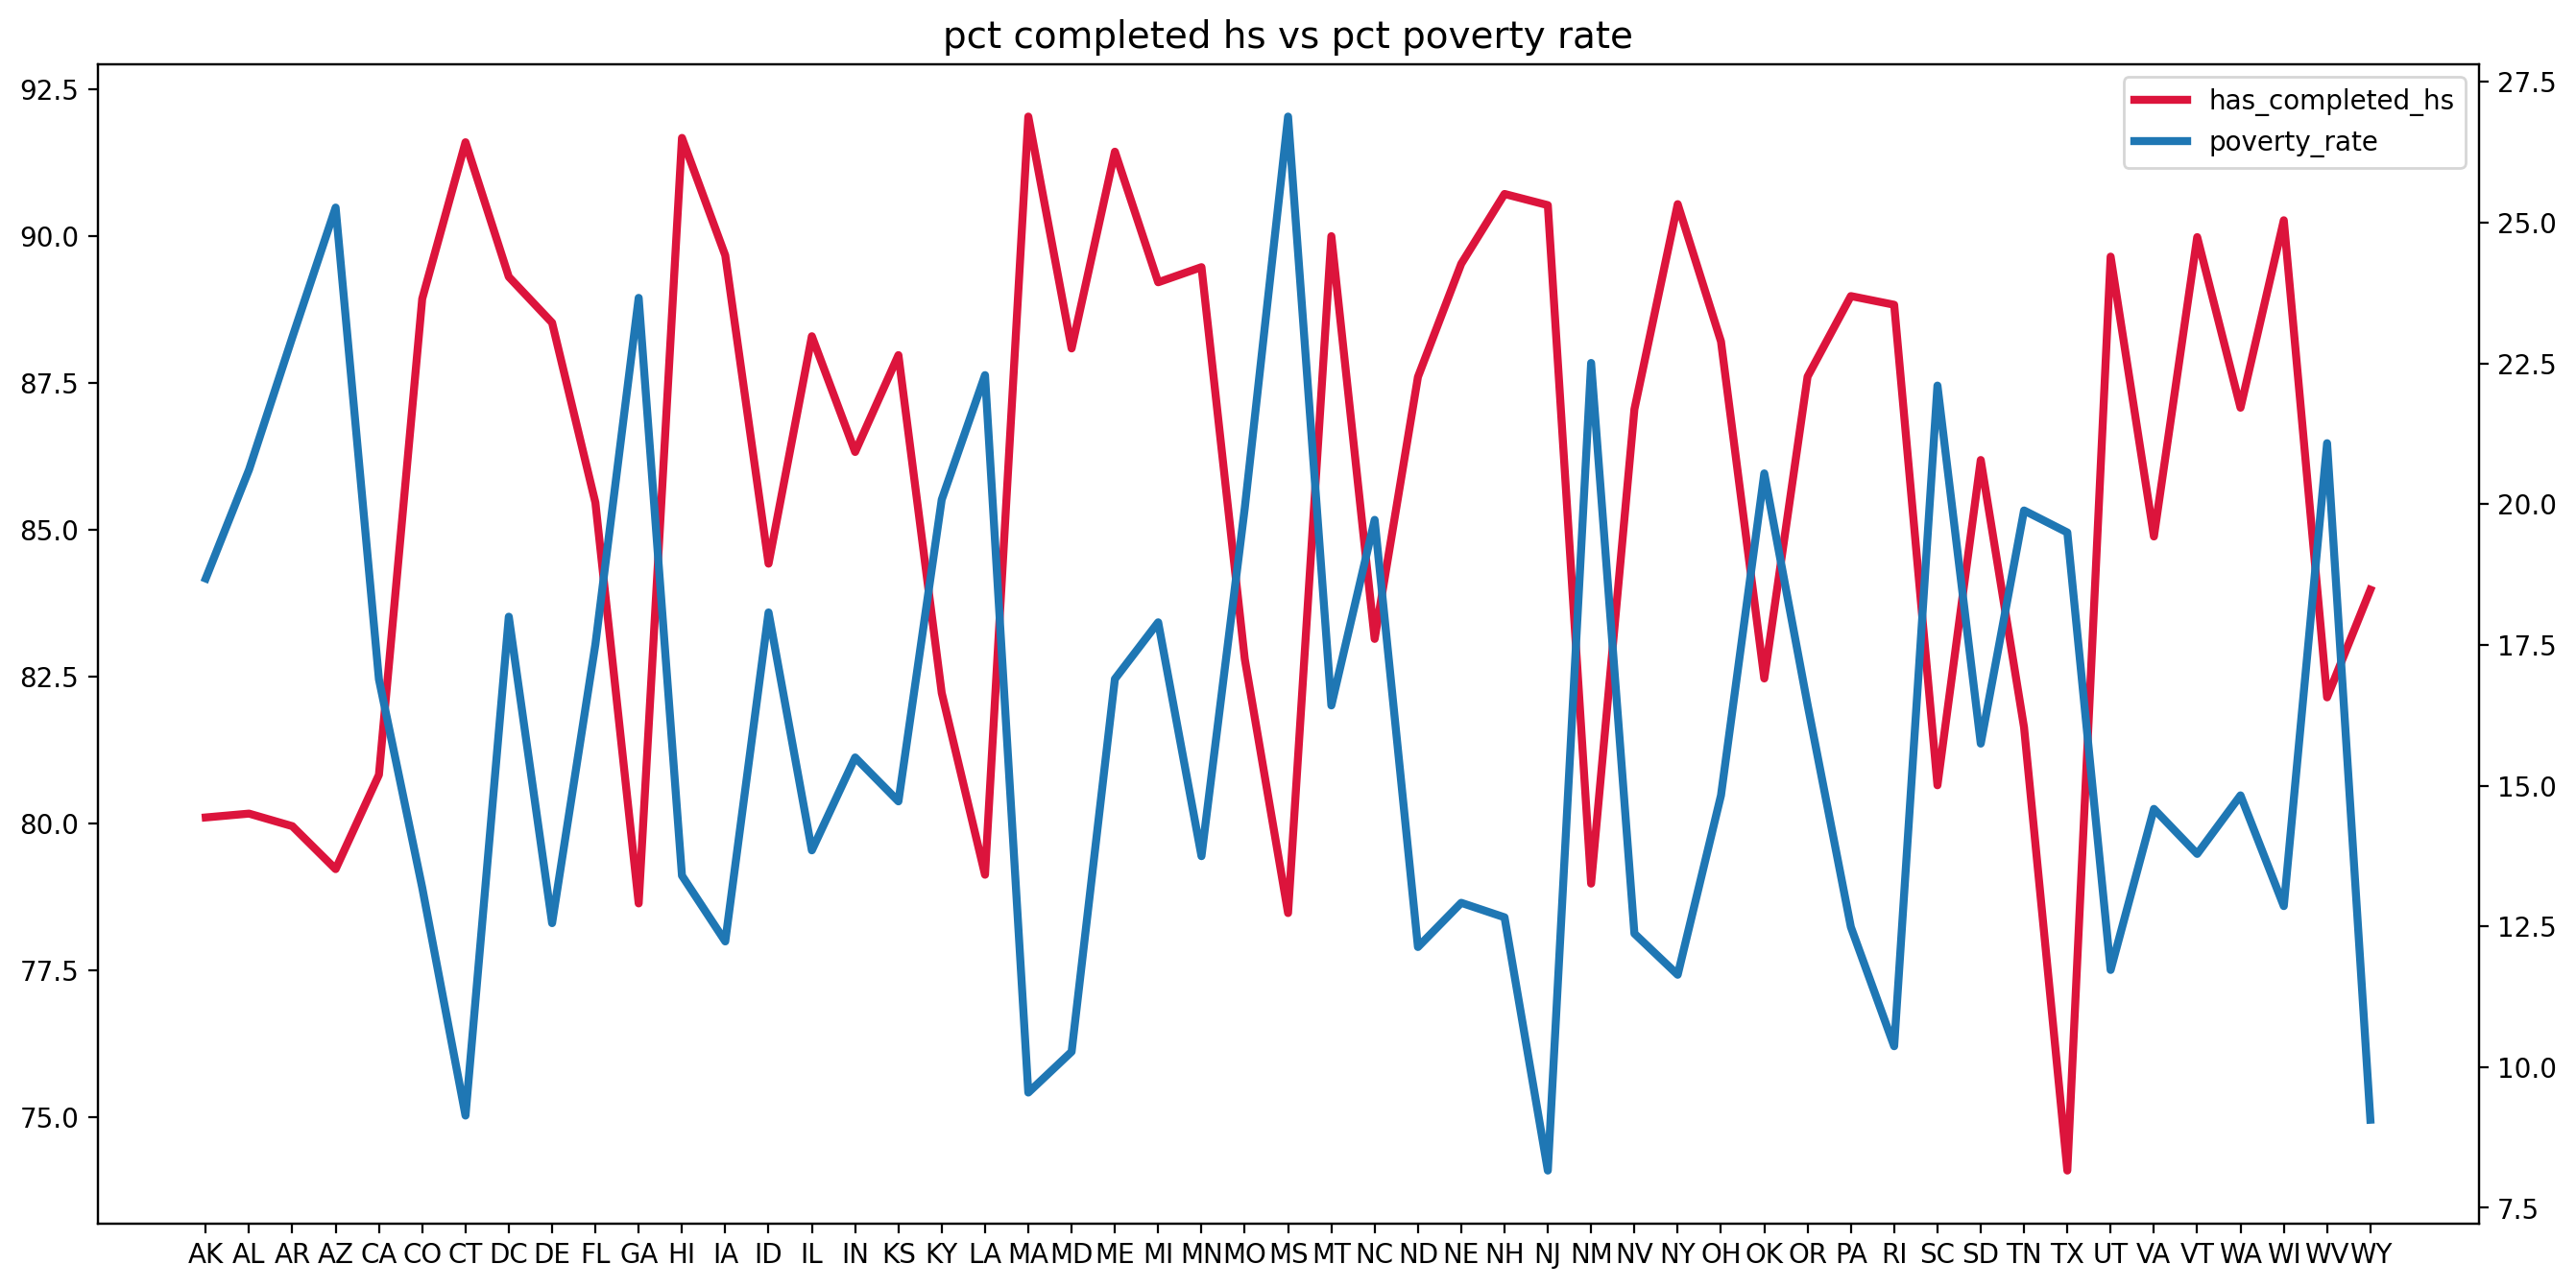

In [291]:

plt.figure(figsize=(16,8), dpi=200)
plt.title("pct completed hs vs pct poverty rate", fontsize=14)
ax = plt.gca()
# plt.xticks(ticks=np.arange(1900, 2021, 5), fontsize=14, 
#            rotation=45)
# ax.set_xlim(1900, 2021)
# ax.scatter(prize_per_year_df["year"], prize_per_year_df["prize"]
# ,color='dodgerblue',
#            alpha=0.7,
#            s=100)
line1 = ax.plot(df_pct_completed_hs["Geographic Area"], df_pct_completed_hs["percent_completed_hs"] , c='crimson', 
        linewidth=3, label="has_completed_hs")
ax2 = ax.twinx()
# ax2.invert_yaxis()
line2 = ax2.plot(df_pct_poverty["Geographic Area"], df_pct_poverty["poverty_rate"] , 
        linewidth=3, label="poverty_rate")
ls = line1 + line2
labs = [l.get_label() for l in ls]
ax.legend(handles=ls, labels=labs)
plt.show()

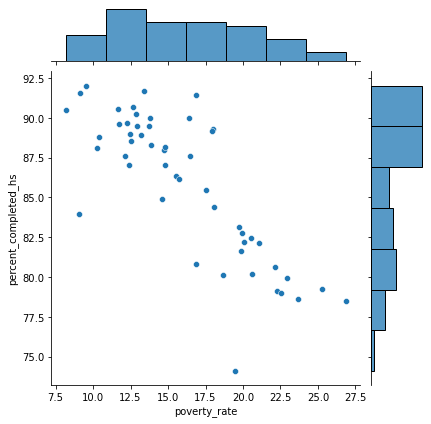

In [292]:
sns.jointplot(x=df_pct_poverty["poverty_rate"], y=df_pct_completed_hs["percent_completed_hs"], kind="scatter")

In [293]:
merged_poverty_df = pd.merge(df_pct_completed_hs, df_pct_poverty, on="Geographic Area")

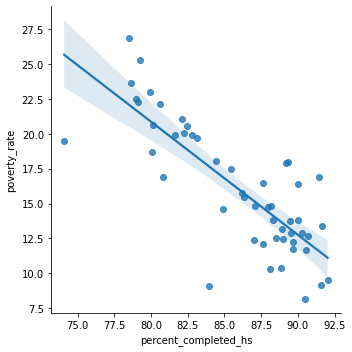

In [294]:
sns.lmplot(data=merged_poverty_df, x="percent_completed_hs", y="poverty_rate" )

### RACIAL DISTRIBUTION BY US STATE

In [306]:
df_share_race_city = df_share_race_city.groupby(["Geographic area"], as_index=False).mean()

In [310]:
df = pd.melt(df_share_race_city,id_vars=['Geographic area'],var_name='race', value_name='pct')
df

,Geographic area,race,pct
0,AK,share_white,45.26
1,AL,share_white,72.51
2,AR,share_white,78.45
3,AZ,share_white,59.93
4,CA,share_white,71.54
...,...,...,...
250,VT,share_hispanic,1.38
251,WA,share_hispanic,10.61
252,WI,share_hispanic,3.32
253,WV,share_hispanic,0.90


In [312]:
fig1 = px.bar(df, x="Geographic area", color="race",
             y='pct',
             title="Share of races by city",
             barmode='group', log_y=True
            )

fig1.show()

### DEATHS BY RACE

In [316]:
df_fatalities.dropna(inplace=True)

In [321]:
px.pie(data_frame=df_fatalities, names="race", hole=0.5, title="Deaths by race")

### DEATHS BY GENDER

In [322]:
px.pie(data_frame=df_fatalities, names="gender", hole=0.5, title="deaths by gender")

### AGE AND MANNER OF DEATH

In [327]:
px.box(data_frame=df_fatalities, x="manner_of_death", y="age", color="gender")

#### VICTIMS AND WEAPON IF ANY

In [331]:
armed_df = df_fatalities.copy()
armed_df = armed_df.groupby(["armed"], as_index=False)["id"].count()
armed_df

,armed,id
0,Taser,6
1,air conditioner,1
2,ax,8
3,baseball bat,7
4,baseball bat and bottle,1
...,...,...
62,toy weapon,102
63,unarmed,165
64,undetermined,92
65,unknown weapon,15


In [388]:
px.bar(data_frame=armed_df.sort_values(by="id", ascending=False), x="armed", y="id", log_y=True)

In [359]:
def group_arms(x):
    if str(x) == "unarmed" or str(x) == "undetermined":
        pass
    else:
        x = "armed"
    return x
armed_df2 = df_fatalities.copy()
armed_df2["armed"] = armed_df2["armed"].apply(group_arms)
armed_df2 = armed_df2.groupby(["armed"], as_index=False).count()


In [360]:
px.bar(data_frame=armed_df2, x="armed", y="id", log_y=True)

### PCT DEATH BY AGE

In [372]:
# PERCENT OF PEOPLE BELOW 25 KILLED
ab_25 = df_fatalities[df_fatalities["age"] <= 25]
bl_25 = df_fatalities[df_fatalities["age"] > 25]
ab_25["pct"] = "below"
bl_25["pct"] = "above"
pct = pd.concat([ab_25, bl_25])
pct = pct.groupby('pct', as_index=False)["id"].count()
px.bar(data_frame=pct, x="pct", y="id")

C:\Users\SAMSON\AppData\Local\Temp\ipykernel_16504\2886189557.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SAMSON\AppData\Local\Temp\ipykernel_16504\2886189557.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



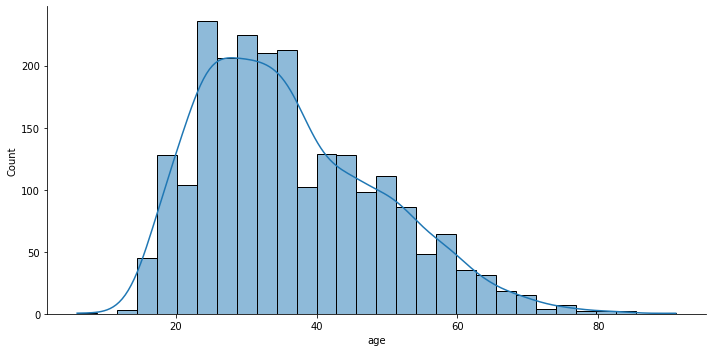

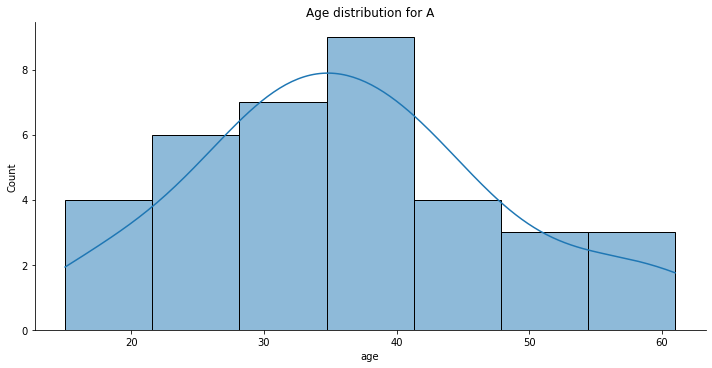

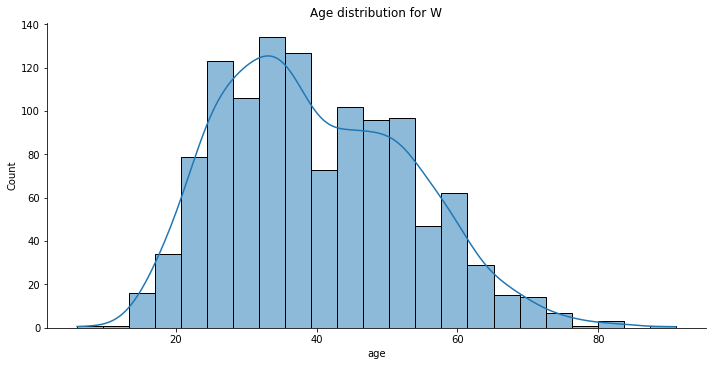

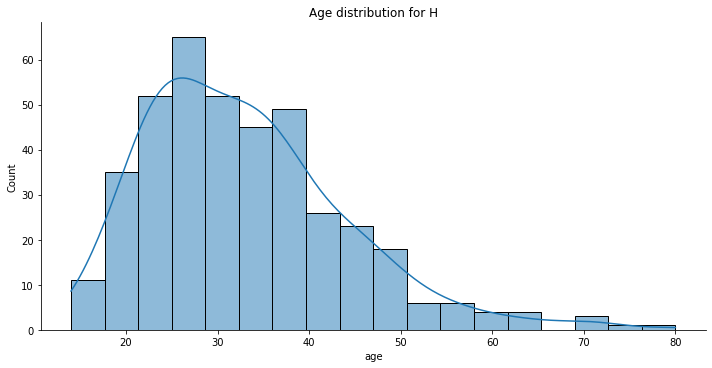

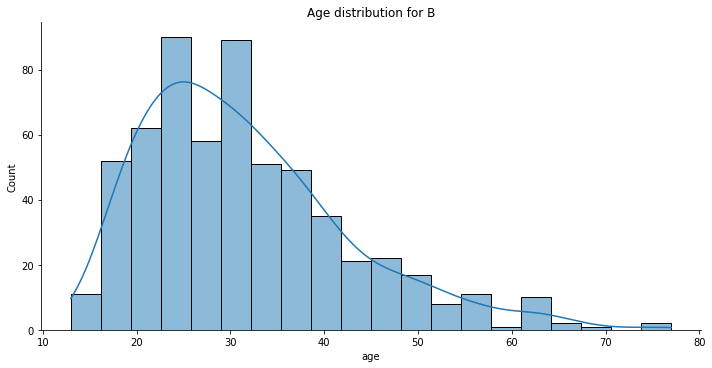

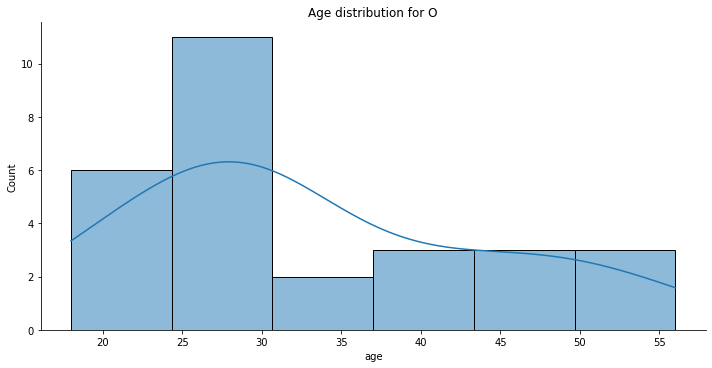

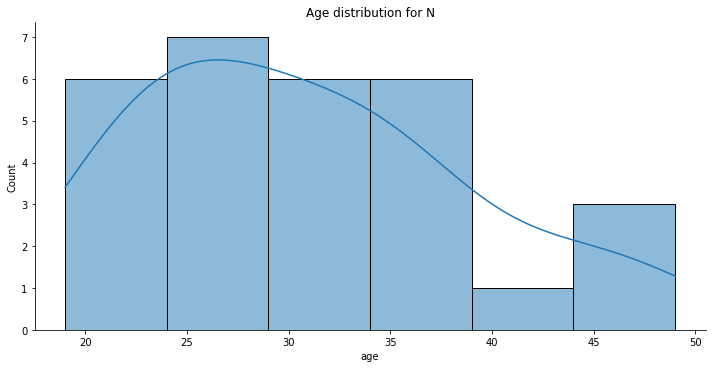

In [368]:
age_df = df_fatalities.copy()
# age_df = age_df.groupby("age", as_index=False)["id"].count()
# px.bar(data_frame=age_df, x="age", y="id")
sns.displot(age_df["age"], aspect=2, kde=True)
for i in age_df["race"].unique():
    sns.displot(age_df[age_df["race"] == i]["age"], aspect=2, kde=True).set(title=f"Age distribution for {i}")

In [389]:
df_race = df_fatalities.copy()
df_race = df_race.groupby("race", as_index=False)["id"].count().sort_values(by="id", ascending=False)
px.bar(data_frame=df_race, x="race", y="id")

### DEATH BY STATE OF MENTAL HEALTH

In [376]:
px.bar(data_frame=df_fatalities.groupby("signs_of_mental_illness", as_index=False)["id"].count(), x="signs_of_mental_illness", y="id")

### TOP TEN CITIES OF DEATH


In [381]:
px.bar(data_frame=df_fatalities.groupby("state", as_index=False)["id"].count().sort_values(by="id", ascending=False)[:10], x="state", y="id")

In [391]:
states = df_fatalities.copy()
states = states.groupby("state", as_index=False)["id"].count().sort_values(by="id", ascending=False)[:10]["state"].values
racial_df_top_ten = df.copy()
racial_df_top_ten = racial_df_top_ten[racial_df_top_ten["Geographic area"].isin(states)]
fig1 = px.bar(racial_df_top_ten, x="Geographic area", color="race",
             y='pct',
             title="Share of races In TOP ten dangerous cities",
             barmode='group', log_y=True
            )

fig1.show()

#### CHLOROPLETH SHOWING POLICE KILLINGS BY RACE

In [394]:
px.choropleth(data_frame=df_fatalities, locations="state", color="race", color_continuous_scale=px.colors.sequential.matter, locationmode='USA-states', scope="usa")

In [395]:
df_fatalities["date"] = pd.DatetimeIndex(pd.to_datetime(df_fatalities["date"], utc=True)).year


### DEATH BY POLICE OVER TIME

In [398]:
px.bar(data_frame=df_fatalities.groupby("date", as_index=False)["id"].count().sort_values(by="id", ascending=False), x="date", y="id")

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,2017,shot,undetermined,16.00,M,B,Marion,AR,False,undetermined,Not fleeing,False
2523,2808,Kesharn K. Burney,2017,shot,vehicle,25.00,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,2017,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False
2533,2817,Isaiah Tucker,2017,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True
